<a href="https://colab.research.google.com/github/asadiv/Pytorch/blob/main/ricevariety_classification_tinyVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import zipfile
from pathlib import Path



In [2]:
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    print("Unzipping rice data...")
    zip_ref.extractall("/content")

Unzipping rice data...


In [3]:
# laoding image data with custom datset

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

import random
from matplotlib import pyplot as plt

In [4]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [5]:
find_classes("Train/train_real")

(['1508', 'Seela', 'Sufaid', 'ari', 'kachi', 'kachi_kainat', 'super'],
 {'1508': 0,
  'Seela': 1,
  'Sufaid': 2,
  'ari': 3,
  'kachi': 4,
  'kachi_kainat': 5,
  'super': 6})

In [6]:
#writing custom dataset

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,targ_dir:str,transform=None) -> None:
    #get all img paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpeg"))
    self.transform = transform
    #setup class names
    self.classes,self.class_to_idx = find_classes(targ_dir)

  #make function for loading iomage
  def load_image(self,index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  #overwrite len fun
  def __len__(self) -> int:
    return len(self.paths)

  #overwrite getitem()
  def __getitem__(self,index:int) -> Tuple[torch.Tensor,int]:
    img =self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx


In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.RandomRotation(degrees=30),
    # transforms.ColorJitter(brightness=0.15, contrast=0.15),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])


torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


<Figure size 1000x700 with 0 Axes>

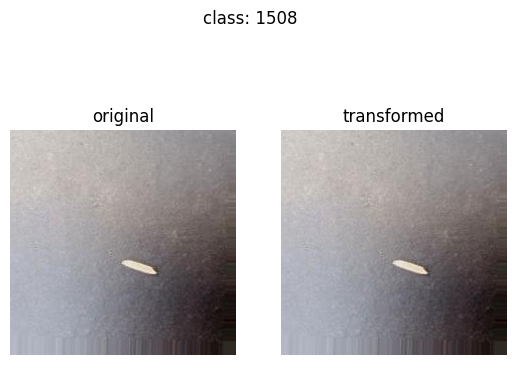

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


<Figure size 1000x700 with 0 Axes>

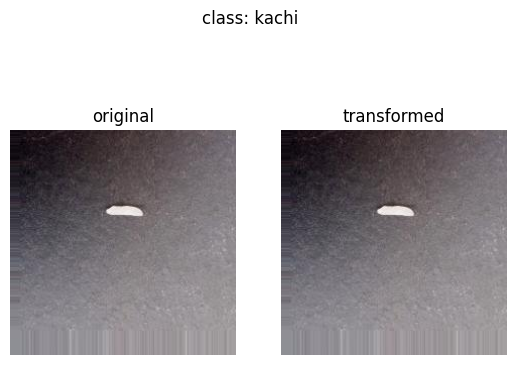

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


<Figure size 1000x700 with 0 Axes>

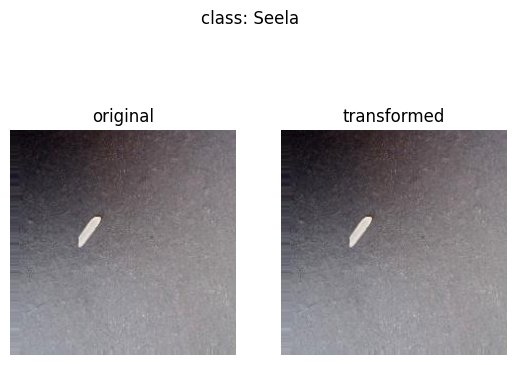

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


<Figure size 1000x700 with 0 Axes>

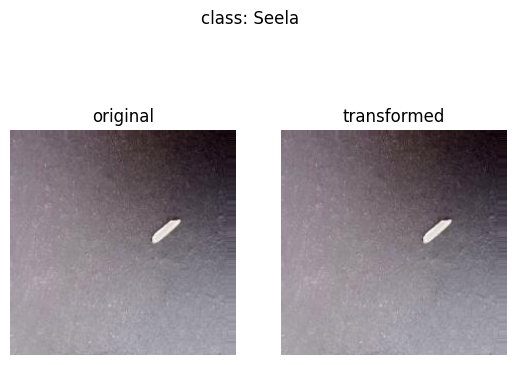

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


<Figure size 1000x700 with 0 Axes>

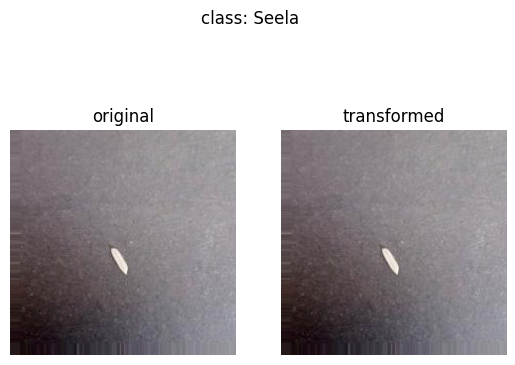

In [9]:

def plot_transformed(img_path,transform,n=3,seed=42):
  # random.seed(seed)
  random_img_path = random.sample(img_path,k=n)
  for image in random_img_path:
    with Image.open(image) as f:
      plt.figure(figsize=(10,7))
      plt.figure()
      plt.subplot(1,2,1)
      plt.imshow(f)
      plt.title(f"original")
      plt.axis(False)

      transformed_img = transform(f) #default shape(C,H,W) matplot req (H,W,C)
      print(transformed_img.shape)
      transformed_img = transformed_img.permute(1,2,0)
      print(transformed_img.shape)
      plt.subplot(1,2,2)
      plt.imshow(transformed_img)
      plt.title(f"transformed")
      plt.axis(False)

      plt.suptitle(f"class: {image.parent.stem}")
      plt.show()

image_path_list = list(pathlib.Path("Train/train_real").glob("*/*.jpeg"))
plot_transformed(image_path_list,train_transforms,5)

In [10]:
from numpy import test
train_data = ImageFolderCustom(
    targ_dir="Train/train_real",
    transform=train_transforms
)
test_data = ImageFolderCustom(
    targ_dir="Validation/val_real",
    transform=test_transforms
)

In [11]:
len(train_data),len(test_data)

(7852, 3350)

In [12]:
train_data.classes, train_data.class_to_idx

(['1508', 'Seela', 'Sufaid', 'ari', 'kachi', 'kachi_kainat', 'super'],
 {'1508': 0,
  'Seela': 1,
  'Sufaid': 2,
  'ari': 3,
  'kachi': 4,
  'kachi_kainat': 5,
  'super': 6})

In [13]:
test_data.classes, test_data.class_to_idx

(['1508', 'Seela', 'Sufaid', 'ari', 'kachi', 'kachi_kainat', 'super'],
 {'1508': 0,
  'Seela': 1,
  'Sufaid': 2,
  'ari': 3,
  'kachi': 4,
  'kachi_kainat': 5,
  'super': 6})

In [14]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,batch_size=32,num_workers = os.cpu_count(),shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=32,num_workers = os.cpu_count(),shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7caca68d6a50>,
 <torch.utils.data.dataloader.DataLoader at 0x7cacaa71c860>)

In [15]:
x,y = next(iter(train_dataloader))
x.shape,y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [16]:
test_targets = []
for _,y in test_dataloader:
  test_targets.append(y)
test_targets_tensor = torch.cat(test_targets)
test_targets_tensor.shape

torch.Size([3350])

In [17]:
#creating a tinyvgg model
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # how big is the square that's going over the image?
                  stride=1, # default
                  padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Dropout(0.15),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Dropout(0.15),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Dropout(0.3),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our input data.
        nn.Linear(in_features=hidden_units*56*56,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
      # x = self.conv_block_1(x)
      # # print(x.shape)
      # x = self.conv_block_2(x)
      # # print(x.shape)
      # x = self.classifier(x)
      # # print(x.shape)
      # return x
      return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=8,
                  output_shape=len(train_data.classes)).to(device)
model_0

cuda


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.15, inplace=False)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.15, inplace=False)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.3, inplace=False)
    (2): Linear(in_features=25088, out_features=7, bias=True)
  )
)

In [18]:
# #creating a tinyvgg model - modified
# from torch import nn
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)
# class TinyVGG(nn.Module):
#   def __init__(self,input_shape:int,hidden_units:int,output_shape:int) -> None:
#     super().__init__()
#     self.conv_block_1 = nn.Sequential(
#         nn.Conv2d(in_channels=input_shape,
#                   out_channels=hidden_units,
#                   kernel_size=3, # how big is the square that's going over the image?
#                   stride=1, # default
#                   padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
#         nn.ReLU(),
#         nn.Dropout(0.25),
#         nn.MaxPool2d(kernel_size=2,stride=2) # default stride value is same as kernel_size
#     )

#     self.classifier = nn.Sequential(
#         nn.Flatten(),
#         nn.Dropout(0.25),
#         # Where did this in_features shape come from?
#         # It's because each layer of our network compresses and changes the shape of our input data.
#         nn.Linear(in_features=hidden_units*128*128,
#                   out_features=output_shape)
#     )

#   def forward(self, x: torch.Tensor):
#       # x = self.conv_block_1(x)
#       # # print(x.shape)
#       # x = self.conv_block_2(x)
#       # # print(x.shape)
#       # x = self.classifier(x)
#       # # print(x.shape)
#       # return x
#       return self.classifier(self.conv_block_1(x)) # <- leverage the benefits of operator fusion

# torch.manual_seed(42)
# model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
#                   hidden_units=8,
#                   output_shape=len(train_data.classes)).to(device)
# model_0

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [21]:

# train function which combines training and testing
from tqdm.auto import tqdm

def train(model:nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          patience:int = 5,
          scheduler:torch.optim.lr_scheduler._LRScheduler=None):
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  best_test_loss = float("inf")
  patience_counter = 0

  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer)
    if scheduler is not None:
      scheduler.step()
    test_loss,test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

    #store data
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
    # if test_loss < best_test_loss:
    #     best_test_loss = test_loss
    #     patience_counter = 0
    # else:
    #     patience_counter += 1
    #     if patience_counter >= patience:
    #         print("Early stopping triggered")
    #         break

  return results

In [22]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=16,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        patience=15
                        )

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.5036 | Train Acc: 0.4031 | Test Loss: 1.5776 | Test Acc: 0.3483
Epoch: 2 | Train Loss: 1.0384 | Train Acc: 0.5980 | Test Loss: 1.2083 | Test Acc: 0.4940
Epoch: 3 | Train Loss: 0.7877 | Train Acc: 0.7010 | Test Loss: 1.3071 | Test Acc: 0.5342
Epoch: 4 | Train Loss: 0.5524 | Train Acc: 0.7920 | Test Loss: 1.2851 | Test Acc: 0.5280
Epoch: 5 | Train Loss: 0.4450 | Train Acc: 0.8320 | Test Loss: 1.2135 | Test Acc: 0.5824
Epoch: 6 | Train Loss: 0.4116 | Train Acc: 0.8426 | Test Loss: 4.0546 | Test Acc: 0.3628
Epoch: 7 | Train Loss: 0.3584 | Train Acc: 0.8626 | Test Loss: 0.7621 | Test Acc: 0.7190
Epoch: 8 | Train Loss: 0.2960 | Train Acc: 0.8855 | Test Loss: 0.5296 | Test Acc: 0.8119
Epoch: 9 | Train Loss: 0.2678 | Train Acc: 0.8966 | Test Loss: 1.1842 | Test Acc: 0.6580
Epoch: 10 | Train Loss: 0.4548 | Train Acc: 0.8369 | Test Loss: 1.1871 | Test Acc: 0.6482
Epoch: 11 | Train Loss: 0.2948 | Train Acc: 0.8876 | Test Loss: 0.3530 | Test Acc: 0.8613
Epoch: 12 | Train L

In [23]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

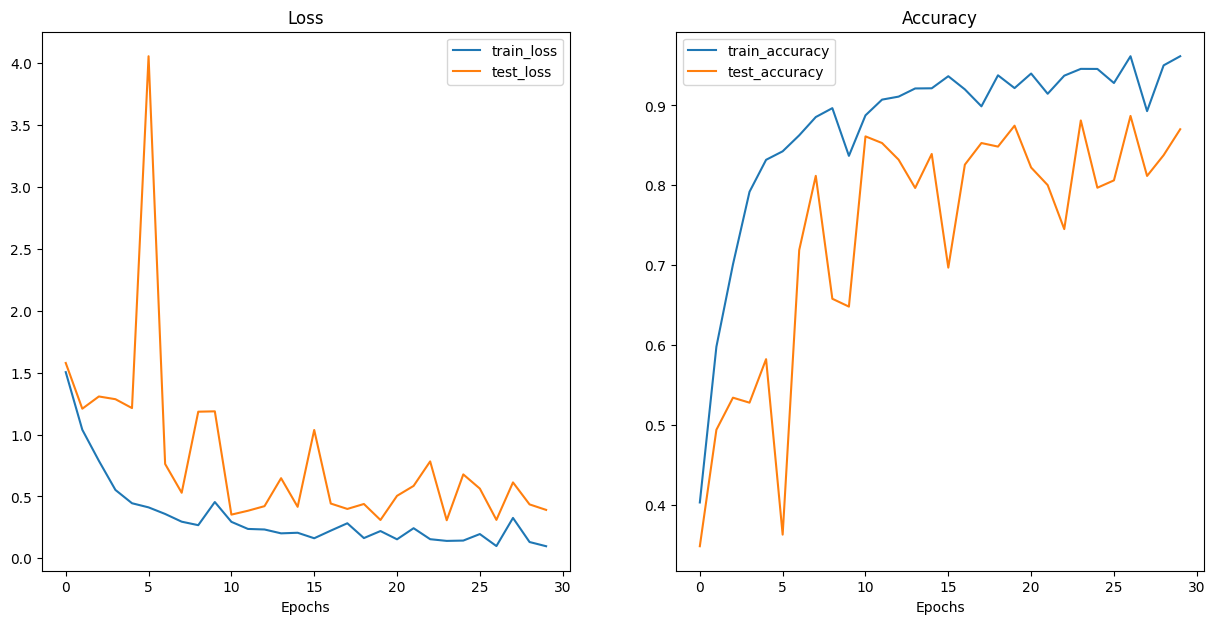

In [24]:
plot_loss_curves(model_0_results)

In [25]:
# plot_loss_curves(model_0_results)

In [32]:

!pip install torchmetrics
!pip install mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
import torchmetrics, mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 23.0 MB/s eta 0:00:00


In [33]:
#MAKE CONFUSION MATRIX
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_0(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.to(device)

Making predictions:   0%|          | 0/105 [00:00<?, ?it/s]

tensor([4, 2, 2,  ..., 6, 6, 6], device='cuda:0')

In [34]:
device

'cuda'

In [35]:
test_targets_tensor = test_targets_tensor.to(device)
y_pred_tensor = y_pred_tensor.to(device)
test_targets_tensor.device,y_pred_tensor.device

(device(type='cuda', index=0), device(type='cuda', index=0))

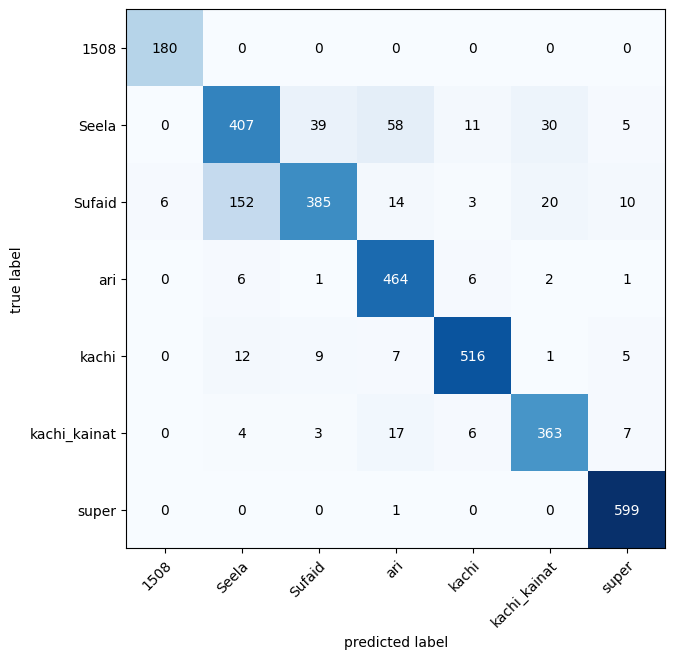

In [36]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
device = "cpu"
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(train_data.classes), task='multiclass').to(device)
confmat_tensor = confmat(preds=y_pred_tensor.to(device),
                         target=test_targets_tensor.to(device))

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=train_data.classes, # turn the row and column labels into class names
    figsize=(10, 7)
);